# Project - Suprvised Learning

###  Import the necessary libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from  sklearn import model_selection

import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# 1. Read the column description and ensure you understand each attribute well

In [103]:
dataframe=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataframe.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [104]:
dataframe=dataframe.drop(labels="ID",axis=1)

In [105]:
dataframe.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [106]:
dataframe.shape   #It consist of 5000 rows and 13 column since 'id' column has been dropped

(5000, 13)

### Data type of each attribute

In [107]:
dataframe.dtypes

Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

* There is no string variable, all are numbers

In [108]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [109]:
dataframe.isna().sum()    # it will give count of NAN in each attribute, since no NAN value is coming as 0

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [110]:
dataframe.isnull().values.any()    #result will show if dataframe is having any null value , false means no null value

False

In [111]:
dataframe.describe()   #it will show mean,median and quantile distribution 
                        #Since Experience showing -ve values need to replace them with median  

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [112]:
median_non_neg_Exp=dataframe[dataframe.Experience >= 0]['Experience'].median()
dataframe.loc[dataframe.Experience < 0, 'Experience'] = median_non_neg_Exp

#Count of -ve Exp is coming 0 now

dataframe[dataframe.Experience < 0]['Experience'].count()

0

In [113]:
dataframe.corr()  # income is showing correlation with CCAvg and Mortgage,

                

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
SecuritiesAccount,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


* i)income is showing correlation with CCAvg and Mortgage,
* ii) Experience is showig positive correlation with Age,
* iii) Rest data is categorical and showing low collinearity

# 2. Study the data distribution in each attribute, share your findings

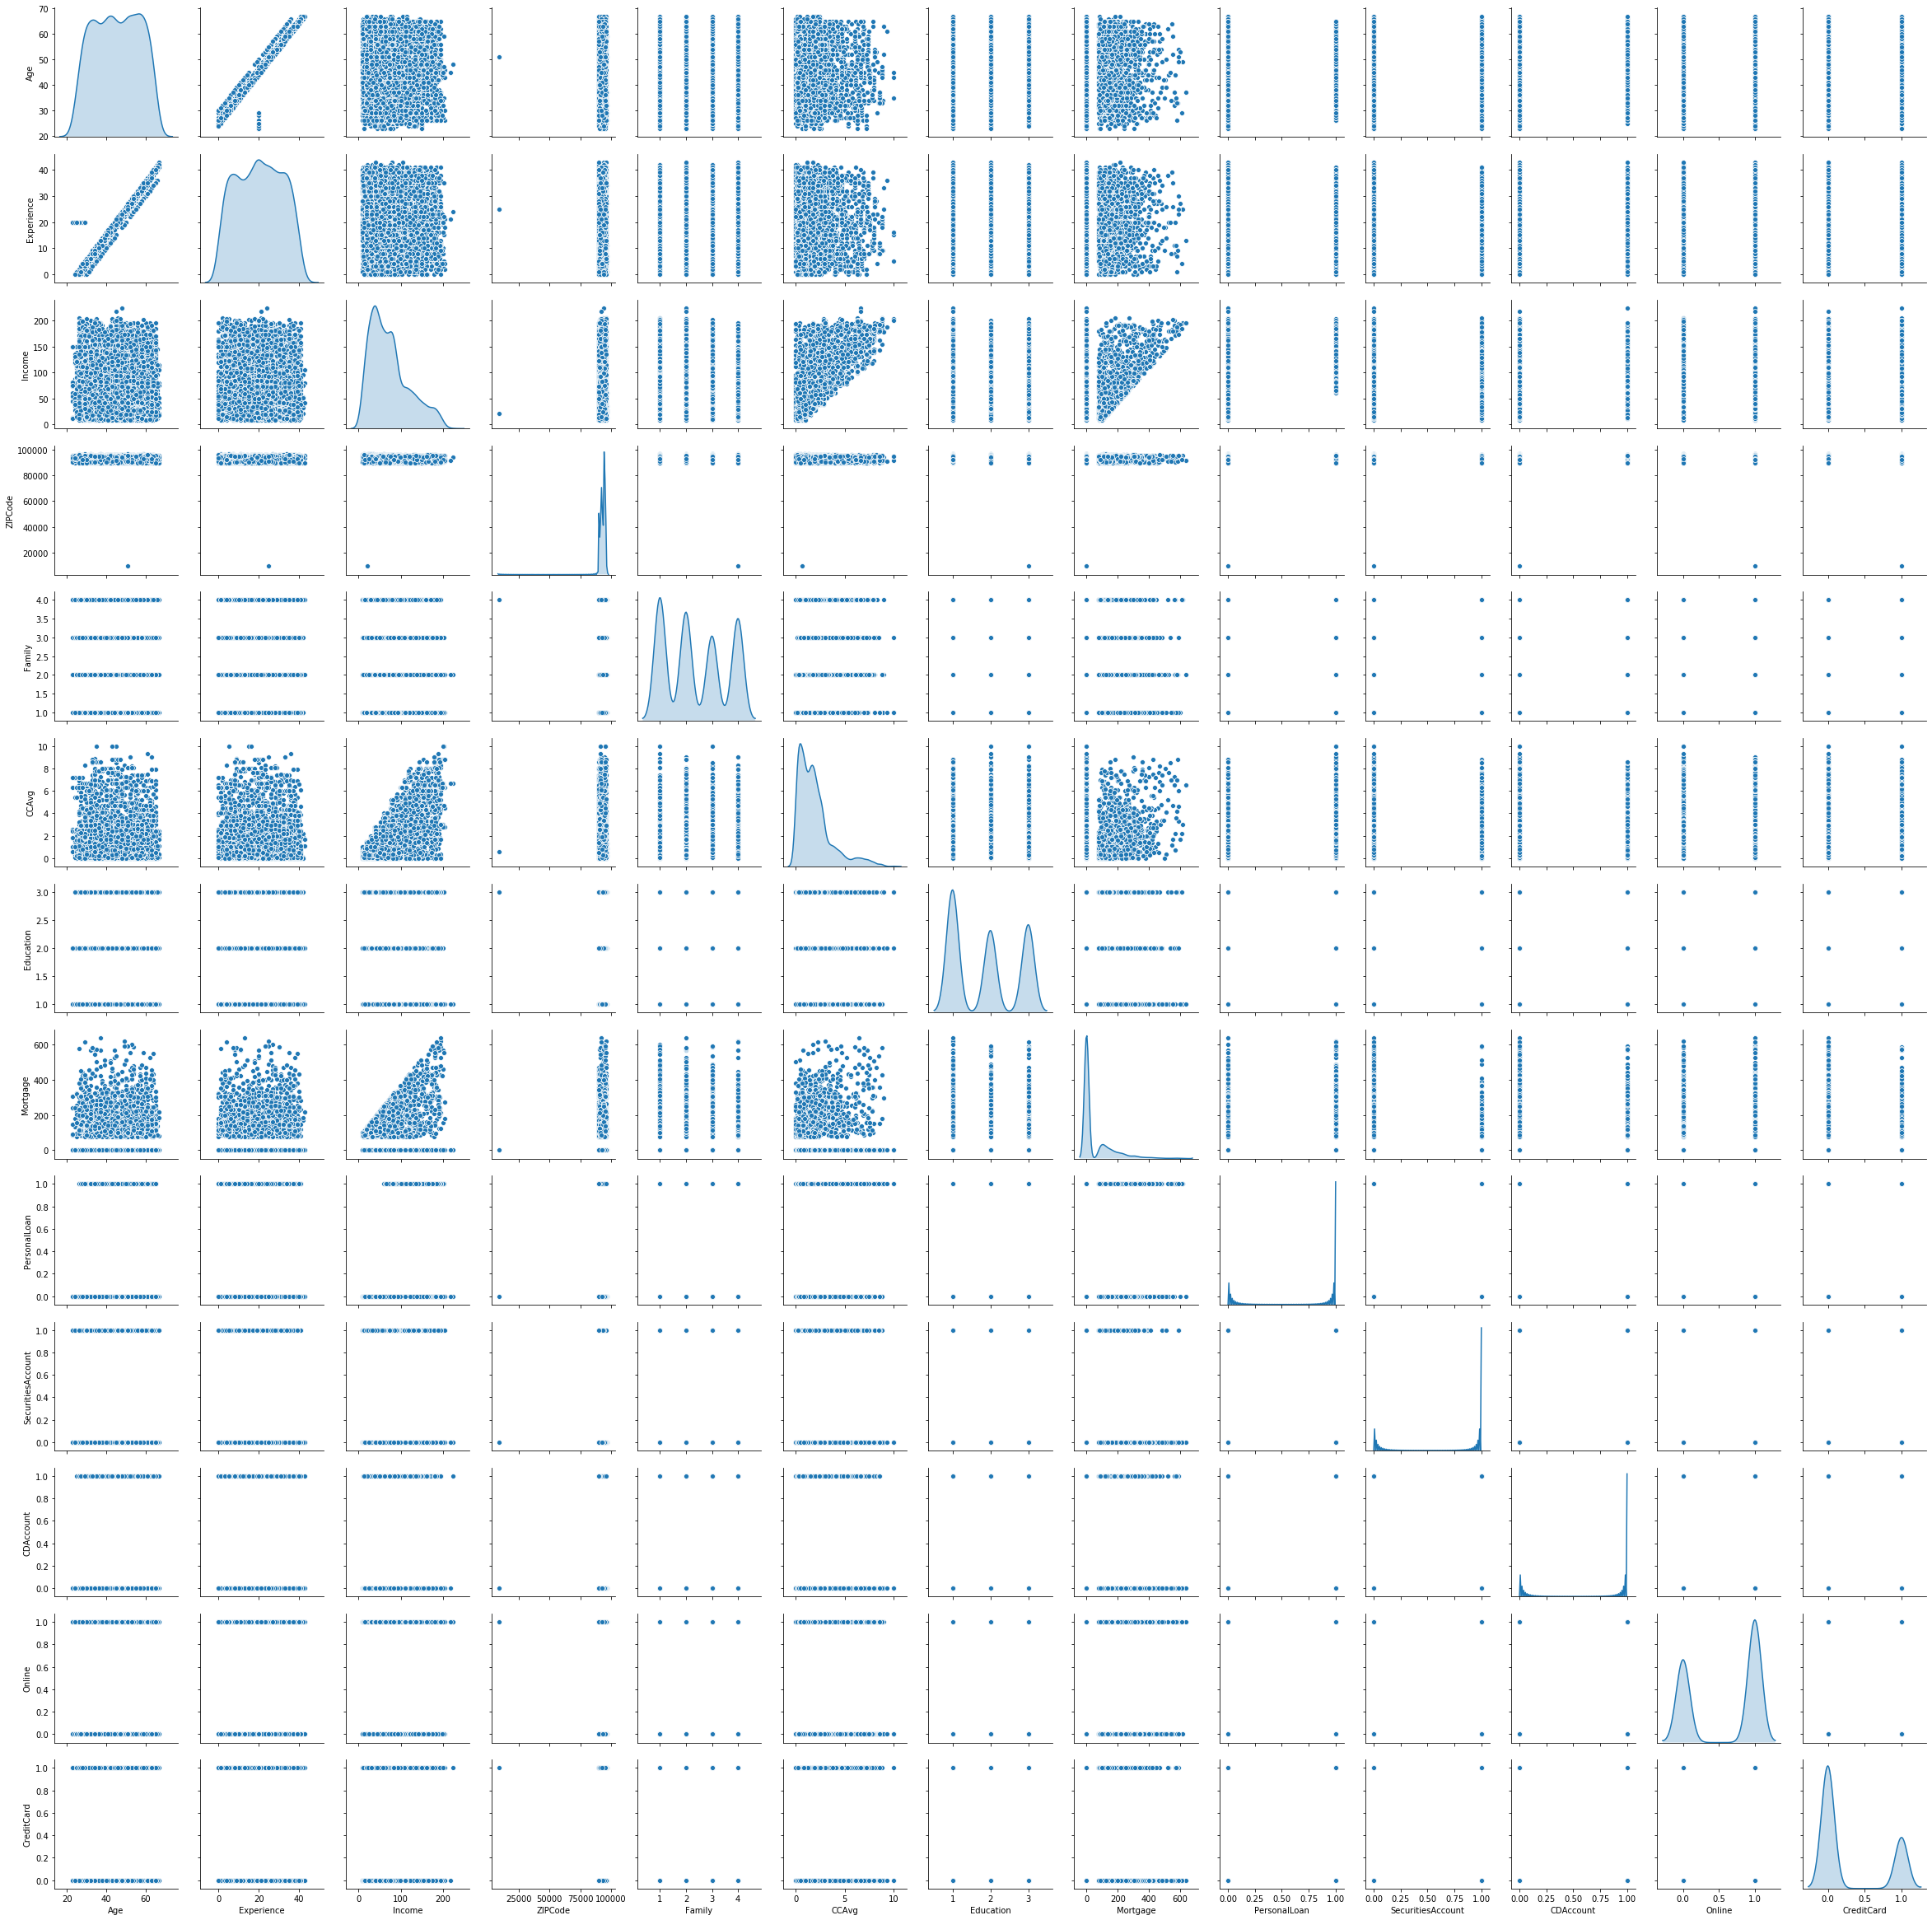

In [154]:
sns.pairplot(dataframe,diag_kind='kde')

**Age** feature is normally distributed.  

**Experience** is normally distributed with more customer having experience starting from 8 years.

**Income** is Right skewed. 

**income** is showing strong correlation with CCAvg and Mortgage,

**Experience** is showig strong correlation with Age,

*Rest data is categorical and showing low collinearity

# 3. Get the target column distribution. Your comments

#### i. Influence of income and education on personal loan


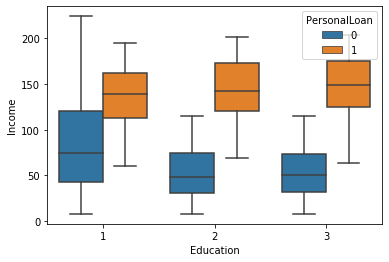

In [114]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=dataframe)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

#### ii. Influence of Education and Mortgage on personal loan

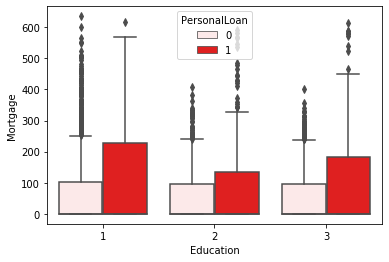

In [115]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=dataframe,color='red')

 **Observation** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

#### iii. Influence of SecuritiesAccount on personal loan

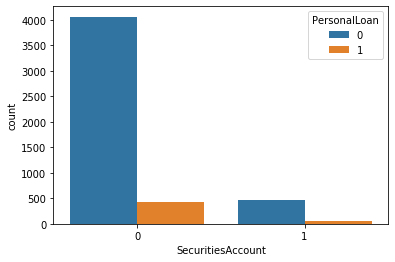

In [116]:
sns.countplot(x="SecuritiesAccount", data=dataframe,hue="PersonalLoan")

**Observation** : Majority of customers who does not have loan have securities account

#### iv. Influence of Family size on personal loan


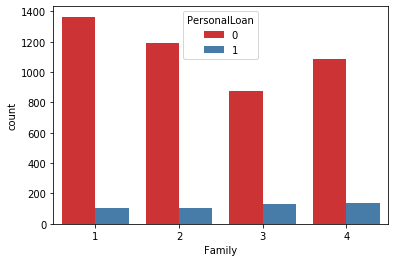

In [117]:
sns.countplot(x='Family',data=dataframe,hue='PersonalLoan',palette='Set1')

**Observation**: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

#### v. Influence of CDAccount on personal loan

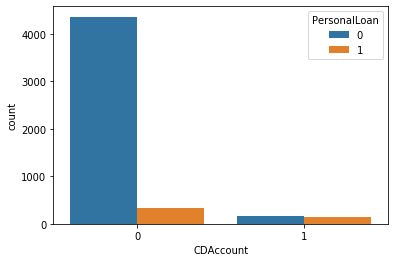

In [118]:
sns.countplot(x='CDAccount',data=dataframe,hue='PersonalLoan')

**Observation:** Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

#### vi. Influence of CCAvg on personal loan

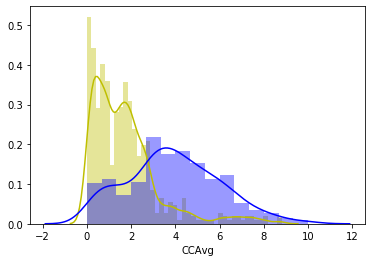

In [119]:
sns.distplot( dataframe[dataframe.PersonalLoan == 0]['CCAvg'], color = 'y')
sns.distplot( dataframe[dataframe.PersonalLoan == 1]['CCAvg'], color = 'b')

**Observation:** The graph show persons who have personal loan have a higher credit card spending.

# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [120]:
n_true=len(dataframe.loc[dataframe['PersonalLoan'] == True])
n_false=len(dataframe.loc[dataframe['PersonalLoan'] == False])
print("Number of True Cases: {0} ({1:2.2f}%)".format(n_true,(n_true/(n_true + n_false))*100))
print("Number of False Cases: {0} ({1:2.2f}%)".format(n_false,(n_false/(n_true + n_false))*100))

Number of True Cases: 480 (9.60%)
Number of False Cases: 4520 (90.40%)


In [121]:
X = dataframe.drop('PersonalLoan',axis=1)
Y=dataframe['PersonalLoan']

In [122]:
X.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')

In [123]:
x_train, x_test, y_train, y_test = train_test_split (X ,Y , test_size = 0.3 , random_state = 1)

In [124]:
y_trainT=len(y_train.loc[y_train[:] == True])
y_trainF=len(y_train.loc[y_train[:] == False])
print("Number of True Cases in training : {0} ({1:2.2f}%)".format(y_trainT,(y_trainT/(y_trainT + y_trainF))*100))
print("Number of False Cases in taining: {0} ({1:2.2f}%)".format(y_trainF,(y_trainF/(y_trainT + y_trainF))*100))

Number of True Cases in training : 331 (9.46%)
Number of False Cases in taining: 3169 (90.54%)


In [125]:
y_testT=len(y_test.loc[y_test[:] == True])
y_testF=len(y_test.loc[y_test[:] == False])
print("Number of True Cases in test : {0} ({1:2.2f}%)".format(y_testT,(y_testT/(y_testT + y_testF))*100))
print("Number of False Cases in test: {0} ({1:2.2f}%)".format(y_testF,(y_testF/(y_testT + y_testF))*100))

Number of True Cases in test : 149 (9.93%)
Number of False Cases in test: 1351 (90.07%)


In [126]:
x_train.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
1334,47,22.0,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14.0,39,93118,1,2.0,2,0,0,0,1,0
65,59,35.0,131,91360,1,3.8,1,0,0,0,1,1
177,29,3.0,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13.0,21,95518,3,0.2,2,0,0,0,1,0


# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

5.1) **Logistic Classification**

In [127]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
probas1_Logistic= model.fit(x_train, y_train).predict_proba(x_test)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.000093 -0.005606  0.036053 -0.000065  0.014866  0.009281  0.016125   

          7         8         9        10        11  intercept  
0  0.000831  0.000524  0.004591 -0.000173 -0.000065  -0.000103  


In [128]:

fpr1,tpr1,threshold1 = roc_curve(y_test,probas1_Logistic[:,1])

roc_auc_logistic = auc(fpr1,tpr1)
#probas1_Logistic


In [129]:
roc_auc_logistic

0.9152107064615324

In [131]:
model_score = model.score(x_test, y_test)
model_score

0.9073333333333333

[[  43  106]
 [  33 1318]]


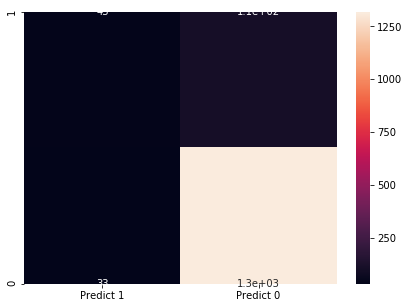

In [132]:
cm_log=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

print(cm_log)
df_cm_log = pd.DataFrame(cm_log, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_log, annot=True)

### 5.2 Naive Bayes Algo

In [134]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model_Naive = GaussianNB()

model_Naive.fit(x_train, y_train.ravel())
probas1_Naive= model_Naive.fit(x_train, y_train).predict_proba(x_test)

In [135]:
probas1_Naive

array([[9.94117634e-01, 5.88236621e-03],
       [9.99952660e-01, 4.73399799e-05],
       [9.99986450e-01, 1.35500524e-05],
       ...,
       [9.99995457e-01, 4.54274365e-06],
       [9.99973884e-01, 2.61163331e-05],
       [9.99977398e-01, 2.26017793e-05]])

In [136]:
Naive_train_predict = model_Naive.predict(x_train)


print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, Naive_train_predict)))


Model Accuracy: 0.8943


In [138]:
 Naive_test_predict = model_Naive.predict(x_test)

print("Model Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(y_test, Naive_test_predict)))
print()


Model Accuracy on test data: 0.8840



In [139]:
model_Naive.score(x_test, y_test)

0.884

Confusion Matrix
[[  85   64]
 [ 110 1241]]


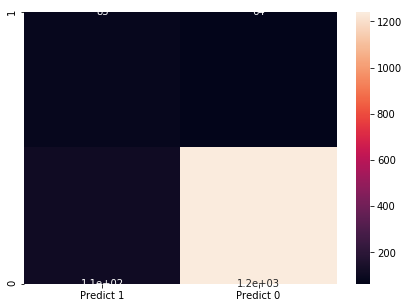

In [140]:
print("Confusion Matrix")
cm_naive=metrics.confusion_matrix(y_test, Naive_test_predict, labels=[1, 0])

print(cm_naive)
df_cm_naive = pd.DataFrame(cm_naive, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_naive, annot=True)

In [141]:
fpr2,tpr2,threshold2 = roc_curve(y_test,probas1_Naive[:,1])

roc_auc_Naive = auc(fpr2,tpr2)
#probas1_Naive
roc_auc_Naive


0.9169096716824227

# KNN

In [142]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.131628e-18,-2.842171e-17,1.449507e-16,1.428191e-15,1.001865e-16,-6.394885e-17,2.557954e-17,-5.613288e-17,-2.273737e-17,2.131628e-17,4.121148e-17,7.105427e-18
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.806591e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.289793e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-2.911506e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.596229e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,2.014982e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [144]:
NNH_model = KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )


In [145]:
NNH_model.fit(X_train, Y_train)
probas1_NNH= NNH_model.fit(X_train, Y_train).predict_proba(X_test)

In [146]:
probas1_NNH

array([[0.40538749, 0.59461251],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [147]:
predicted_labels = NNH_model.predict(X_test)
NNH_model.score(X_test, Y_test)

0.9486666666666667

# 6. Print the confusion matrix for all the above models

In [148]:
print("confusion matrix for logistic Regression : \n{} ".format(cm_log))

confusion matrix for logistic Regression : 
[[  43  106]
 [  33 1318]] 


In [149]:
print("confusion matrix for logistic Regression : \n{} ".format(cm_naive))

confusion matrix for logistic Regression : 
[[  85   64]
 [ 110 1241]] 


Confusion Matrix for KNN Regression:
[[  79   70]
 [   7 1344]]


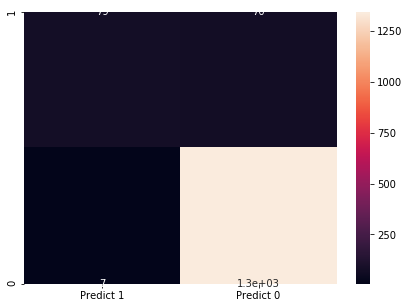

In [150]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix for KNN Regression:")
cm_KNN=metrics.confusion_matrix(Y_test, predicted_labels, labels=[1, 0])

print(cm_KNN) 
df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_KNN, annot=True)

In [151]:
fpr3,tpr3,threshold3 = roc_curve(Y_test,probas1_NNH[:,1])

roc_auc_NNH = auc(fpr3,tpr3)
#probas1_Naive
roc_auc_NNH

0.902463499570291

# 7. Give your reasoning on which is the best model in this case and why it performs better?

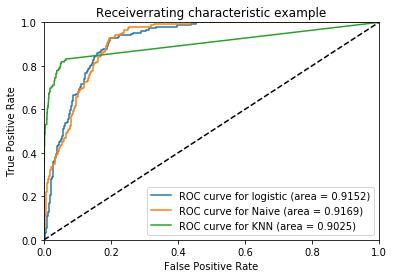

In [152]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.4f)' % roc_auc_logistic)
pl.plot(fpr2, tpr2, label='ROC curve for Naive (area = %0.4f)' % roc_auc_Naive)
pl.plot(fpr3, tpr3, label='ROC curve for KNN (area = %0.4f)' % roc_auc_NNH)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

* Since **Naive Bayes** showing good ROC it is best Modal out of three. Since ROC is independent of skewness 
    of different classes and ratio of test and train sample. Result of ROC is considered as more genralize to fit.
* Although **KNN** is showing higher accuracy but considering accuracy for best model is not sufficient as it is impacted by the
positive and negative cases and ratio of test and train data.